In [1]:
%matplotlib inline  
# Step 1 - import the same libraries as before and matplotlib so we can do some plotting
# Above we also set the 'inline' option so that our plots will appear directly in the notebook

import spacy
import os
import numpy
from matplotlib import pyplot as plt
from statistics import mean, median

In [2]:
# Step 2 - as before, we load spacy and define our polarity function

nlp = spacy.load('en_core_web_lg')


def polarity_good_vs_bad(word):
    """Returns a positive number if a word is closer to good than it is to bad, or a negative number if vice versa
    IN: word (str): the word to compare
    OUT: diff (float): positive if the word is closer to good, otherwise negative
    """

    good = nlp("good")
    bad = nlp("bad")
    word = nlp(word)
    if word and word.vector_norm:
        sim_good = word.similarity(good)
        sim_bad = word.similarity(bad)
        diff = sim_good - sim_bad
        diff = round(diff * 100, 2)
        return diff
    else:
        return None

In [3]:
# Step 3 - read in some positive and negative reviews from the dataset available at 
# https://ai.stanford.edu/~amaas/data/sentiment/


# replace with the path to the 'train' folder on your filesystem after extracting
review_dataset_dir = "../Data/aclImdb/train"

pos_scores = []
neg_scores = []

LIMIT = 2000

for pol in ("pos", "neg"):
    review_files = os.listdir(os.path.join(review_dataset_dir, pol))
    review_files = review_files[:LIMIT]
    print("Processing {} review files".format(len(review_files)))
    for i, rf in enumerate(review_files):
        with open(os.path.join(review_dataset_dir, os.path.join(pol,rf))) as f:
            s = f.read()
            score = polarity_good_vs_bad(s)
            if pol == "pos":
                pos_scores.append(score)
            elif pol == "neg":
                neg_scores.append(score)



Processing 2000 review files
Processing 2000 review files


We grabbed some files from each of the 'neg' (negative) and 'pos' (positive) training folders, calculated the polarity score for each using our crude sentiment analyzer from Exercise 01, and keep a record of these scores. If the sentiment analyzer is good, it will give high scores to the 'pos' reviews and low scores to the 'neg' reviews.

In [4]:
# Step 4 - look at the mean and median of each set of scores
mean_pos = mean(pos_scores)
mean_neg = mean(neg_scores)
med_pos = median(pos_scores)
med_neg = median(neg_scores)

print(f"Mean polarity score of positive reviews: {mean_pos}")
print(f"Mean polarity score of negative reviews: {mean_neg}")
print(f"Median polarity score of positive reviews: {med_pos}")
print(f"Median polarity score of negative reviews: {med_neg}")

Mean polarity score of positive reviews: 4.88497
Mean polarity score of negative reviews: 3.18847
Median polarity score of positive reviews: 4.84
Median polarity score of negative reviews: 3.2350000000000003


We can see that there some difference in the direcection that we expect, with the positive reviews on average having a higher polarity score than the negative ones. However, the difference is not that big, and the negative reviews on average have a positive score still, while our polarity function gives a negative score for obviously negative words. Let's take a look at the distribution of the two scores

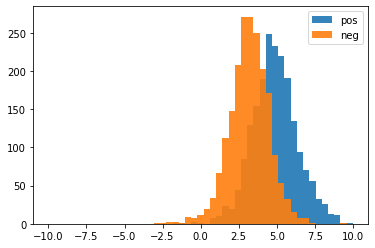

In [5]:
# Step 5 - plot histograms of the scores for positive and negative reviews.
bins = numpy.linspace(-10.0, 10.0, 50)

plt.hist(pos_scores, bins, alpha=0.9, label='pos')
plt.hist(neg_scores, bins, alpha=0.9, label='neg')
plt.legend(loc='upper right')

plt.show()

We can see that the trend is in the right direction, but that the scores are not enough to fully differentiate between positive and negative movie reviews. One important limitation of our classifier is that it is based on single words and not phrases. Language is complicated. Let's take a look at how words like 'not' can make sentiment analysis more difficult.

In [6]:
# Step 6 - calculate the polarity scores of some phrases relating to how good a movie was.

phrases = [
    "the movie was good",
    "the movie was not good",
    "good",
    "not",
    "the movie was very good",
    "the movie was very very good",
    "the movie was bad",
    "the movie was very very very bad"  
]

for phrase in phrases:
    print(phrase, polarity_good_vs_bad(phrase))

the movie was good 8.14
the movie was not good 6.78
good 26.45
not 0.33
the movie was very good 11.35
the movie was very very good 13.27
the movie was bad -8.47
the movie was very very very bad 5.31


Because our crude polarity calculator averages together the 'meanings' of the words by using their word vectors, the phrase 'not good' is the average of the words 'not' and 'good'. Good has a strongly positive score, and 'not' has a neutral score, so 'not good' is still seen as overall positive. On the other hand, 'very' is closer to 'good' in our vector space than it is to 'bad', so with enough occurences of 'very' in a phrase, the negative score from 'bad' can be cancelled out, leaving us with an overall positive score.

In this exercise, we built a basic demostration on how to find the *limitations* in what an algorithm can do. Ethically, it is very important to know the limits of machine learning and AI, but in many cases, including in the case studies that we looked at, the creators of the algorithms were too excited at the initially promising results, and probably did not spend enough time looking for the limitations.